In [2]:
import numpy as np
import pandas as pd

### Generate Synthetic Data

In [14]:
# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic data
n = 1000  # number of rows
data = pd.DataFrame({
    'Income': np.random.normal(50000, 15000, n),  # Income with some variance
    'Credit_Score': np.random.randint(300, 850, n),  # Random credit scores
    'Loan_Amount': np.random.uniform(1000, 50000, n),  # Loan amounts
    'Employment_Years': np.random.randint(0, 40, n),  # Employment history in years
    'Payment_History': np.random.randint(0, 100, n),  # % of on-time payments
    'Credit_Utilization': np.random.uniform(0, 1, n),  # Ratio of credit utilization
    'Account_Age': np.random.randint(1, 20, n),  # Years since account opened
    'Defaulted': np.random.binomial(1, 0.1, n)  # Defaulted (10% chance)
})

print(data.head())

         Income  Credit_Score   Loan_Amount  Employment_Years  \
0  57450.712295           727  31934.070102                24   
1  47926.035482           604  29993.160953                 2   
2  59715.328072           616  35429.054881                14   
3  72845.447846           308  12634.239950                28   
4  46487.699379           372  26105.825100                31   

   Payment_History  Credit_Utilization  Account_Age  Defaulted  
0               41            0.281393            4          0  
1               46            0.822228            4          0  
2               36            0.752849            4          0  
3               79            0.732859            4          0  
4               21            0.876192           18          0  


### Build PD Model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [20]:
# using logistic regression 

In [21]:
# Split data into features and target
X = data[['Income', 'Credit_Score', 'Loan_Amount', 'Employment_Years', 'Payment_History', 'Credit_Utilization', 'Account_Age']]
y = data['Defaulted']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model on scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score after scaling: {auc}')

AUC Score after scaling: 0.5668329831932774


### Create Visualizations

In [7]:
import matplotlib.pyplot as plt

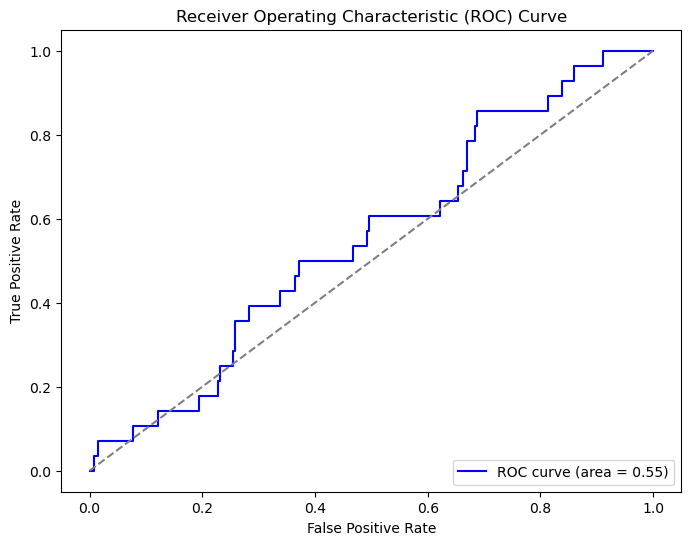

In [8]:
# ROC Curve: Shows the trade-off between sensitivity and specificity at various threshold settings.

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

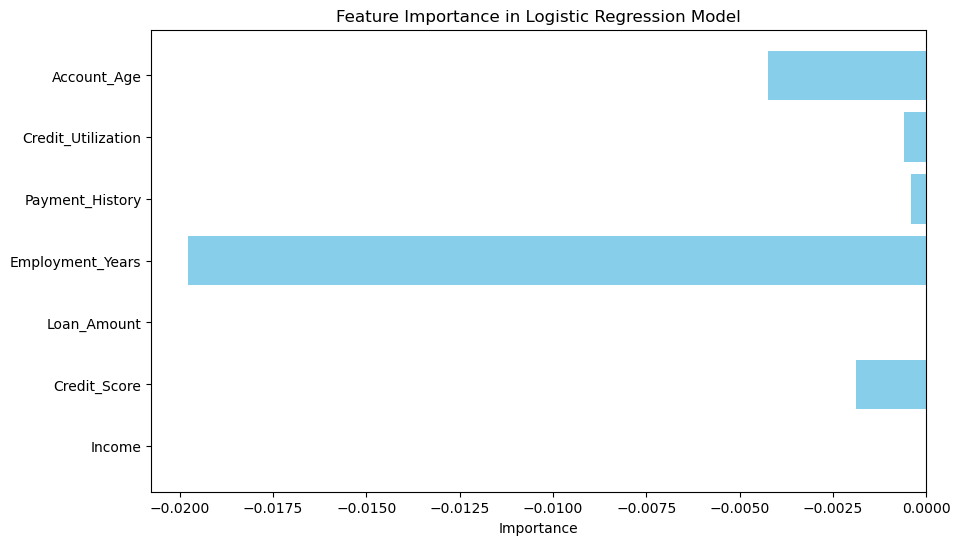

In [9]:
# Feature Importance: For logistic regression, the coefficients represent the importance of each feature.

importance = model.coef_[0]
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()